In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
%reload_ext autoreload
%autoreload 2


In [8]:
df = pd.read_csv("startup_funding.csv")

Loading the dataset

In [9]:
df = df.copy().drop(['Remarks', 'Sr No'], axis=1)
df = df.dropna(axis=0)

droping the unnecessary columns

cleaning up date column

In [10]:
for i in df["Date dd/mm/yyyy"]:
    if(i.count("/")<2):
        if(i.count(".")>0):
            df[df["Date dd/mm/yyyy"]==i] = str(i).replace(".","/")
        elif(i.count("/")>0):
            df[df["Date dd/mm/yyyy"]==i] =  i[0:5] + "/" + i[5:]


In [11]:

df["Date"] = pd.to_datetime(df["Date dd/mm/yyyy"], errors = "coerce")
df["Year"] = df["Date"].dt.year
df["Year"]

0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
2098    2016
2100    2016
2101    2016
2102    2016
2103    2016
Name: Year, Length: 1406, dtype: int64

convert strings in date to datetime object and create new column year

In [12]:
df["Industry Vertical"].unique()

array(['E-Tech', 'Transportation', 'E-commerce', 'FinTech',
       'Fashion and Apparel', 'Logistics', 'Hospitality', 'Technology',
       'E-Commerce', 'Aerospace', 'B2B-focused foodtech startup', 'Video',
       'Gaming', 'Software', 'Health and wellness', 'Education',
       'Food and Beverage', 'Health and Wellness', 'B2B Marketing',
       'Video Games', 'SaaS', 'Last Mile Transportation', 'Healthcare',
       'Customer Service', 'B2B', 'Consumer Goods',
       'Advertising, Marketing', 'IoT', 'Information Technology',
       'Consumer Technology', 'Accounting', 'Finance',
       'Customer Service Platform', 'Automotive', 'EdTech', 'Services',
       'Compliance', 'Transport', 'Artificial Intelligence', 'Tech',
       'Health Care', 'Luxury Label', 'Waste Management Service',
       'Deep-Tech', 'Energy', 'Digital Media', 'Saas', 'Automobile',
       'Agtech', 'Social Media', 'Fintech', 'Edtech', 'AI', 'Ecommerce',
       'Nanotechnology', 'Services Platform', 'Travel Tech',
     

Checking for unique identifiers and cleaning up the data

In [13]:
df=df.rename(columns={"Amount in USD":"Amount","Industry Vertical":"Industry_type"})
df.columns=[x.replace(' ','_') for x in df.columns]
df["Amount"] = [str(x).replace(',','') for x in df["Amount"]]
df["Amount"] = [str(x).replace('.','') for x in df["Amount"]]
df["Amount"] = [str(x).replace('+','') for x in df["Amount"]]
A = df.index[df['Amount'] == "unknown"].tolist()
B = df.index[df['Amount'] == "Undisclosed"].tolist()
C= df.index[df['Amount'] == "undisclosed"].tolist()
df1 = A + B +C
df1

[34, 58, 112, 139, 20, 89, 91]

In [14]:
df["Year"] = df["Year"].astype(int)

In [15]:
df["Industry_type"].unique()

array(['E-Tech', 'Transportation', 'E-commerce', 'FinTech',
       'Fashion and Apparel', 'Logistics', 'Hospitality', 'Technology',
       'E-Commerce', 'Aerospace', 'B2B-focused foodtech startup', 'Video',
       'Gaming', 'Software', 'Health and wellness', 'Education',
       'Food and Beverage', 'Health and Wellness', 'B2B Marketing',
       'Video Games', 'SaaS', 'Last Mile Transportation', 'Healthcare',
       'Customer Service', 'B2B', 'Consumer Goods',
       'Advertising, Marketing', 'IoT', 'Information Technology',
       'Consumer Technology', 'Accounting', 'Finance',
       'Customer Service Platform', 'Automotive', 'EdTech', 'Services',
       'Compliance', 'Transport', 'Artificial Intelligence', 'Tech',
       'Health Care', 'Luxury Label', 'Waste Management Service',
       'Deep-Tech', 'Energy', 'Digital Media', 'Saas', 'Automobile',
       'Agtech', 'Social Media', 'Fintech', 'Edtech', 'AI', 'Ecommerce',
       'Nanotechnology', 'Services Platform', 'Travel Tech',
     

Binning the same rows in similar catagories

In [16]:
df=df.replace("Food-Tech","FoodTech")
df=df.replace("B2B Marketing","B2B")
df=df.replace("B2B Platform","B2B")
df=df.replace("B2B-focused foodtech startup","B2B")
df=df.replace("Consumer internet","Consumer Internet")
df=df.replace("Consumer Technology","Consumer Internet")
df=df.replace("Consumer Portal","Consumer Internet")
df=df.replace("Consumer Goods","Consumer Internet")
df=df.replace("Customer Service Platform","Customer Service")
df=df.replace("E-Tech","E-commerce")
df=df.replace("ECommerce","E-commerce")
df=df.replace("Ecommerce'","E-commerce")
df=df.replace("Ed-Tech","E-commerce")
df=df.replace("Ed-tech","E-commerce")
df=df.replace("EdTech","E-commerce")
df=df.replace("Edtech'","E-commerce")
df=df.replace("E-Commerce","E-commerce")
df=df.replace("Ecommerce","E-commerce")
df=df.replace("Edtech","E-commerce")
df=df.replace("Deep-Tech","E-commerce")
df=df.replace("Fiinance","Finance")
df=df.replace("Financial Tech","Finance")
df=df.replace("Fintech","Finance")
df=df.replace("Fin-Tech","Finance")
df=df.replace("Financial Tech","Finance")
df=df.replace("FinTech","Finance")
df=df.replace("Food","Food & Beverage")
df=df.replace("Food & Beverages","Food & Beverage")
df=df.replace("FoodTech","Food & Beverage")
df=df.replace("Food Tech","Food & Beverage")
df=df.replace("Food and Beverages","Food & Beverage")
df=df.replace("eCommece","E-commerce")
df=df.replace("eCommerce","E-commerce")
df=df.replace("ecommerce","E-commerce")
df=df.replace("Digital Media","E-commerce")
df=df.replace("Food and Beverage","Food & Beverage")
df=df.replace('healthcare','Health and wellness')
df=df.replace('Healthcare','Health and wellness')
df=df.replace('Health and Wellness','Health and wellness')
df=df.replace('Tech', 'Technology')
df=df.replace('Travel Tech','Technology')
df=df.replace('Software','Technology')
df=df.replace('Ecommerce','E-commerce')
df=df.replace('Agtech','Agriculture')
df=df.replace("AI",'Artificial Intelligence')
df=df.replace ("Automation",'Automobile')
df=df.replace('Automotive','Automobile')
df=df.replace("Nanotechnology",'Artificial Intelligence')
df=df.replace('Health Care','Health and wellness')
df=df.replace('Hospitality','Health and wellness')
df=df.replace('Online Education', 'Education')
df=df.replace('Logistics Tech','Technology')
df=df.replace('Clean-tech','Technology')
df=df.replace('FMCG','Technology')
df=df.replace('Video','Technology')
df=df.replace('Video Games','Technology')
df=df.replace('Services Platform','Customer Service')
df=df.replace('Transport','Transportation')
df=df.replace('SaaS','Others')
df=df.replace('Reality','Others')
df=df.replace('Last Mile Transportation','Transportation')
df=df.replace('Saas','Transportation')
df=df.replace('Publishing','Transportation')
df=df.replace('SaaS','Others')
df=df.replace('Services','Customer Service')
df=df.replace('IT', 'Information Technology')
df=df.replace('Inspiration', 'Investment')
df=df.replace('IoT','Investment')
df=df.replace('NBFC','Others')
df=df.replace('SaaS','Others')
df=df.replace('Social Media','Social Network')
df=df.replace('SaaS, Ecommerce','E-commerce')
df=df.replace('Online Marketplace','E-commerce')
df=df.replace('Luxury Label','Others')
df=df.replace('Media', 'Others')
df=df.replace('Advertising, Marketing','E-commerce')
df=df.replace('Artificial Intelligence','Technology')


In [17]:
len(df["Industry_type"].unique())

27

In [18]:
df.columns=[x.replace(' ','_') for x in df.columns]

In [19]:
cleaning the Amount column

SyntaxError: invalid syntax (<ipython-input-19-dbd8ab0030a0>, line 1)

In [20]:
df["Amount"] = [str(x).replace(',','') for x in df["Amount"]]
df["Amount"] = [str(x).replace('.','') for x in df["Amount"]]
df["Amount"] = [str(x).replace('+','') for x in df["Amount"]]

In [21]:
A = df.index[df['Amount'] == "unknown"].tolist()
B = df.index[df['Amount'] == "Undisclosed"].tolist()
C= df.index[df['Amount'] == "undisclosed"].tolist()
df1 = A + B +C
df1

[34, 58, 112, 139, 20, 89, 91]

In [22]:
df.drop(labels=df1,axis=0,inplace=True)

In [23]:
len(df["Industry_type"].unique())

27

In [24]:
df2=df[["Year","Industry_type","Amount"]]
df2

,Year,Industry_type,Amount
0,2020,E-commerce,200000000
1,2020,Transportation,8048394
2,2020,E-commerce,18358860
3,2020,Finance,3000000
4,2020,Fashion and Apparel,1800000
...,...,...,...
2098,2016,Consumer Internet,160000
2100,2016,Consumer Internet,185000
2101,2016,Consumer Internet,17000000
2102,2016,E-commerce,5150000


In [25]:
df2 = df2[df2.Amount != "05/07/2018"]

<ipython-input-26-ca6660c46e6c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Amount'] = df2['Amount'].astype(int)


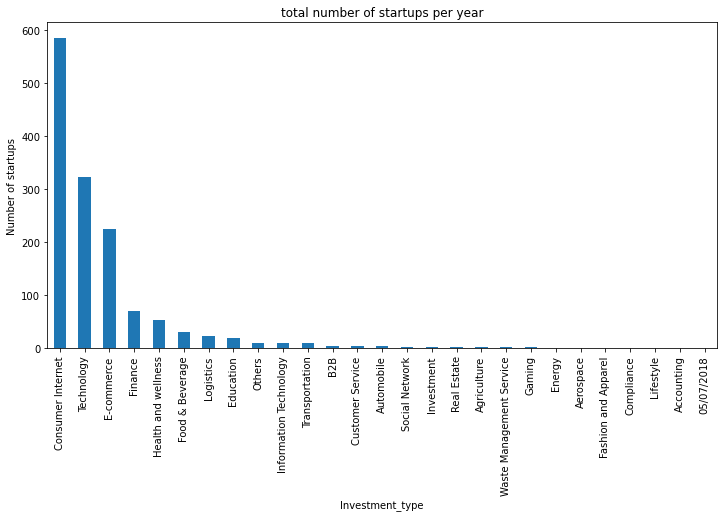

In [26]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 45)


df["Industry_type"].value_counts().plot(kind = "bar").set(xlabel="Investment_type",ylabel="Number of startups",title = "total number of startups per year")

df2['Amount'] = df2['Amount'].astype(int)


this graph describes the number of startups in each investment type and it gives the general idea of which sector did well from 2016 to 2020

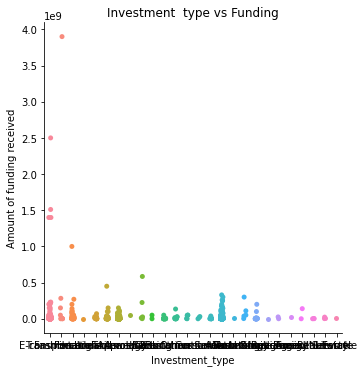

In [27]:
sns.catplot(x="Industry_type", y="Amount", data=df2,).set(xlabel="Investment_type",ylabel="Amount of funding received",title = "Investment  type vs Funding")



The above graphs describes the number of Investments and type of investments happened from 2016 to 2020 in india and it is clear that consumer internet,technology and ecommerce industries receied height amount of investments 

<AxesSubplot:xlabel='Industry_type', ylabel='Amount'>

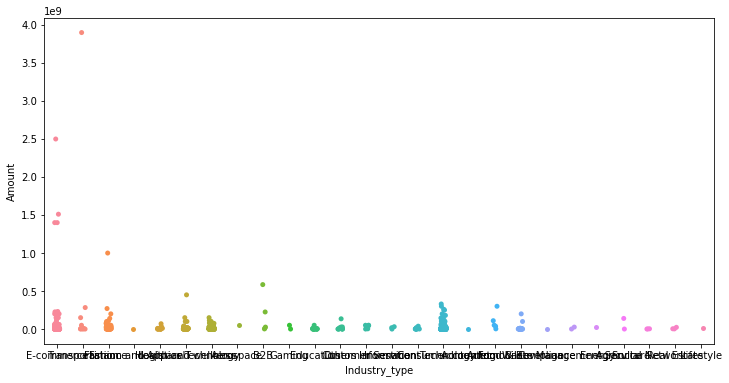

In [28]:
plt.figure(figsize=(12,6))
sns.stripplot(x="Industry_type",y="Amount",data=df2,jitter=True)

In [29]:
df2['Amount'] = df['Amount'].astype(int)

ValueError: invalid literal for int() with base 10: '05/07/2018'

In [30]:
df2['Amount']

0       200000000
1         8048394
2        18358860
3         3000000
4         1800000
          ...    
2098       160000
2100       185000
2101     17000000
2102      5150000
2103      1100000
Name: Amount, Length: 1398, dtype: int64

In [31]:
df2["Amount"].describe()#these are characterstics of all the startups together

count    1.398000e+03
mean     2.155473e+07
std      1.475122e+08
min      1.800000e+04
25%      5.000000e+05
50%      2.000000e+06
75%      8.036296e+06
max      3.900000e+09
Name: Amount, dtype: float64

In [32]:
df3 = df2.groupby("Year").describe()
#Each Industry type characterstics
df3.columns

MultiIndex([('Amount', 'count'),
            ('Amount',  'mean'),
            ('Amount',   'std'),
            ('Amount',   'min'),
            ('Amount',   '25%'),
            ('Amount',   '50%'),
            ('Amount',   '75%'),
            ('Amount',   'max')],
           )

In [33]:
df3

Amount                                                                \
      count          mean           std        min        25%         50%   
Year                                                                        
2016  584.0  6.554856e+06  1.960837e+07    22500.0   250000.0   1000000.0   
2017  455.0  2.291563e+07  1.521641e+08    18000.0   560000.0   2250000.0   
2018  252.0  1.788505e+07  4.066260e+07    80000.0  1000000.0   4000000.0   
2019  100.0  1.098163e+08  4.297451e+08   145000.0  3225000.0  14671000.0   
2020    7.0  5.574389e+07  8.290898e+07  1800000.0  5524197.0   9000000.0   

                                
             75%           max  
Year                            
2016   4050000.0  2.000000e+08  
2017   7650000.0  2.500000e+09  
2018  14710000.0  3.000000e+08  
2019  51000000.0  3.900000e+09  
2020  84179430.0  2.000000e+08

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Mean'),
 Text(0.5, 1.0, 'Mean Investments per year')]

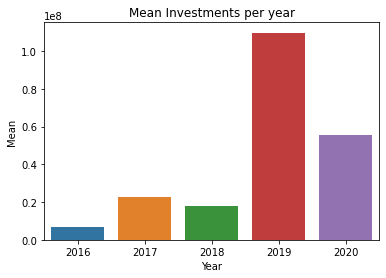

In [34]:
df2.groupby("Industry_type").describe()

sns.barplot(y=df3[("Amount", "mean")], x = ["2016","2017", "2018", "2019", "2020"], data= df3).set(xlabel="Year",ylabel="Mean",title = "Mean Investments per year")

The above graph describe the relation between the year and sample average  amount of investment that all the startups received in that particular year and it is clear that 2019 has the highest sample average of amount compared to rest of the years 

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Amount'),
 Text(0.5, 1.0, 'Number of Investments per year')]

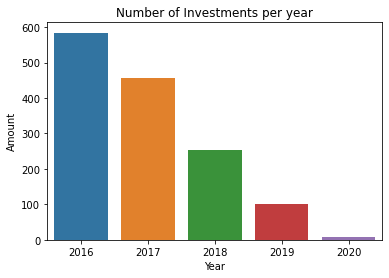

In [35]:
sns.barplot(y=df3[("Amount", "count")], x = ["2016","2017", "2018", "2019", "2020"], data= df3).set(xlabel="Year",ylabel="Amount",title = "Number of Investments per year")

the above graph describe the relation between the year and number of startups that happended in india in each particular year and its clear that 2016 has more startups than any other year.

In [36]:
df2.groupby("Year").describe()

Amount                                                                \
      count          mean           std        min        25%         50%   
Year                                                                        
2016  584.0  6.554856e+06  1.960837e+07    22500.0   250000.0   1000000.0   
2017  455.0  2.291563e+07  1.521641e+08    18000.0   560000.0   2250000.0   
2018  252.0  1.788505e+07  4.066260e+07    80000.0  1000000.0   4000000.0   
2019  100.0  1.098163e+08  4.297451e+08   145000.0  3225000.0  14671000.0   
2020    7.0  5.574389e+07  8.290898e+07  1800000.0  5524197.0   9000000.0   

                                
             75%           max  
Year                            
2016   4050000.0  2.000000e+08  
2017   7650000.0  2.500000e+09  
2018  14710000.0  3.000000e+08  
2019  51000000.0  3.900000e+09  
2020  84179430.0  2.000000e+08

how did the different types of startups in india performed from 2016 to 2020?
Based on the above the graphs its clear that 2016 has more startups than rest of the years yet the maximum amount investment received in the 2019 and also most of the starts ups that happened from 2016 to 2020 are consumer internet and ecommerce types.

Method Chaining

In [1]:
df_toClean = (
        pd.read_csv("startup_funding.csv")
        .drop(['Remarks', 'Sr No'], axis=1)
        .dropna(axis=0)
        .apply(lambda x: x.replace(".", "/") if x.name == "Date dd/mm/yyyy" else x)
        .assign(Date = lambda x: pd.to_datetime(x["Date dd/mm/yyyy"], errors = "coerce"))
        .assign(Year = lambda x: x["Date"].dt.year)
        .rename(columns={"Amount in USD":"Amount","Industry Vertical":"Industry_type"})
        .replace("Food-Tech","FoodTech")
        .replace("B2B Marketing","B2B")
        .replace("B2B Platform","B2B")
        .replace("B2B-focused foodtech startup","B2B")
        .replace("Consumer internet","Consumer Internet")
        .replace("Consumer Technology","Consumer Internet")
        .replace("Consumer Portal","Consumer Internet")
        .replace("Consumer Goods","Consumer Internet")
        .replace("Customer Service Platform","Customer Service")
        .replace("E-Tech","E-commerce")
        .replace("ECommerce","E-commerce")
        .replace("Ecommerce'","E-commerce")
        .replace("Ed-Tech","E-commerce")
        .replace("Ed-tech","E-commerce")
        .replace("EdTech","E-commerce")
        .replace("Edtech'","E-commerce")
        .replace("E-Commerce","E-commerce")
        .replace("Ecommerce","E-commerce")
        .replace("Edtech","E-commerce")
        .replace("Deep-Tech","E-commerce")
        .replace("Fiinance","Finance")
        .replace("Financial Tech","Finance")
        .replace("Fintech","Finance")
        .replace("Fin-Tech","Finance")
        .replace("Financial Tech","Finance")
        .replace("FinTech","Finance")
        .replace("Food","Food & Beverage")
        .replace("Food & Beverages","Food & Beverage")
        .replace("FoodTech","Food & Beverage")
        .replace("Food Tech","Food & Beverage")
        .replace("Food and Beverages","Food & Beverage")
        .replace("eCommece","E-commerce")
        .replace("eCommerce","E-commerce")
        .replace("ecommerce","E-commerce")
        .replace("Digital Media","E-commerce")
        .replace("Food and Beverage","Food & Beverage")
        .replace('healthcare','Health and wellness')
        .replace('Healthcare','Health and wellness')
        .replace('Health and Wellness','Health and wellness')
        .replace('Tech', 'Technology')
        .replace('Travel Tech','Technology')
        .replace('Software','Technology')
        .replace('Ecommerce','E-commerce')
        .replace('Agtech','Agriculture')
        .replace("AI",'Artificial Intelligence')
        .replace ("Automation",'Automobile')
        .replace('Automotive','Automobile')
        .replace("Nanotechnology",'Artificial Intelligence')
        .replace('Health Care','Health and wellness')
        .replace('Hospitality','Health and wellness')
        .replace('Online Education', 'Education')
        .replace('Logistics Tech','Technology')
        .replace('Clean-tech','Technology')
        .replace('FMCG','Technology')
        .replace('Video','Technology')
        .replace('Video Games','Technology')
        .replace('Services Platform','Customer Service')
        .replace('Transport','Transportation')
        .replace('SaaS','Others')
        .replace('Reality','Others')
        .replace('Last Mile Transportation','Transportation')
        .replace('Saas','Transportation')
        .replace('Publishing','Transportation')
        .replace('SaaS','Others')
        .replace('Services','Customer Service')
        .replace('IT', 'Information Technology')
        .replace('Inspiration', 'Investment')
        .replace('IoT','Investment')
        .replace('NBFC','Others')
        .replace('SaaS','Others')
        .replace('Social Media','Social Network')
        .replace('SaaS, Ecommerce','E-commerce')
        .replace('Online Marketplace','E-commerce')
        .replace('Luxury Label','Others')
        .replace('Media', 'Others')
        .replace('Advertising, Marketing','E-commerce')
        .replace('Artificial Intelligence','Technology')
    )
df_toClean.head()

NameError: name 'pd' is not defined